In [1]:
#importing all the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [3]:
#loading the data set and checking what the data looks like
filename="C:/Users/Sidharth Jahagirdar/Desktop/hr_data.csv"
df=pd.read_csv(filename)
df.head(10)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
5,1060,2,153,3,0,1,0,sales,low
6,1061,6,247,4,0,1,0,sales,low
7,1576,5,259,5,0,1,0,sales,low
8,1752,5,224,5,0,1,0,sales,low
9,1988,2,142,3,0,1,0,sales,low


In [4]:
#checking if there any null values in the data set that need to be replaced
df.isnull().any()

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [5]:
#loading the 2nd data set and checking what the data looks like
filename2="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
df2=pd.read_excel(filename2)
df2.head(10)


,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
5,1060,0.41,0.50
6,1061,0.10,0.77
7,1576,0.92,0.85
8,1752,0.89,1.00
9,1988,0.42,0.53


In [6]:
#performing a join operation on the 1st data set and the 2nd data set and checking if the join is sucessful
main_df=df.set_index('employee_id').join(df2.set_index('EMPLOYEE #'))
main_df.head(10)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52
1060,2,153,3,0,1,0,sales,low,0.41,0.50
1061,6,247,4,0,1,0,sales,low,0.10,0.77
1576,5,259,5,0,1,0,sales,low,0.92,0.85
1752,5,224,5,0,1,0,sales,low,0.89,1.00


In [7]:
#checking if there are any null values in the new data  set formed by joining the 1st data set and 2nd data set
main_df[main_df.isnull().any(axis=1)]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
3794,2,160,3,1,1,1,sales,low,NaN,NaN
1140,5,262,5,0,1,0,sales,low,NaN,0.89
1230,2,140,3,0,1,0,hr,low,NaN,NaN
1340,2,132,3,0,1,0,support,low,NaN,NaN
22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
1581,2,143,3,0,1,0,sales,low,NaN,NaN
17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
1739,4,158,4,1,1,0,technical,low,NaN,NaN
1847,2,129,3,0,1,0,management,low,NaN,NaN


In [8]:
#Replacing the null values by median values of the respective attributes.
#The reason for using median in place of mean is median is not affected by outliers as opposed to mean
main_df.fillna(main_df.median(),inplace=True)

No handles with labels found to put in legend.


                       number_project  average_montly_hours  \
number_project               1.000000              0.417211   
average_montly_hours         0.417211              1.000000   
time_spend_company           0.196786              0.127755   
Work_accident               -0.004741             -0.010143   
left                         0.023787              0.071287   
promotion_last_5years       -0.006064             -0.003544   
satisfaction_level          -0.143939             -0.020924   
last_evaluation              0.348767              0.339005   

                       time_spend_company  Work_accident      left  \
number_project                   0.196786      -0.004741  0.023787   
average_montly_hours             0.127755      -0.010143  0.071287   
time_spend_company               1.000000       0.002120  0.144822   
Work_accident                    0.002120       1.000000 -0.154622   
left                             0.144822      -0.154622  1.000000   
promotion_la

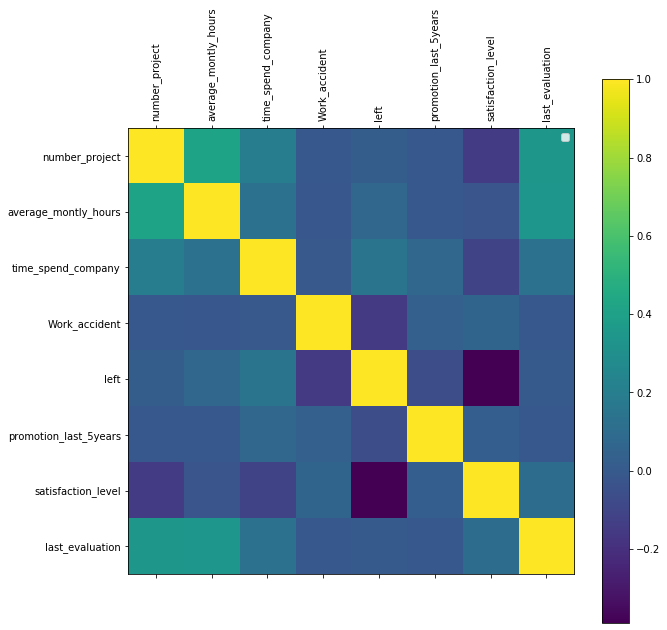

In [9]:
#Making a correlation between different attributes to see if there are relations between them
def correlation(df,size=10):
    corr=df.corr()
    print(corr)
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
correlation(main_df)

In [10]:
#Performing Hot encoding on categorical data
categorical=['department','salary']
main_df_final=pd.get_dummies(main_df,columns=categorical)

In [11]:
#Creating dependent variable for Multi-variate logistic regression
y=main_df_final['left']
y.shape
y=np.array(y).reshape(-1,1)
y.shape

(14999, 1)

In [12]:
#Creating independent variable for Multi-variate logistic regression
x=main_df_final.drop(['left'],axis=1).values
x.shape

(14999, 20)

In [13]:
#Splitting training data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
#Scaling test data
#Scaling and fitting training data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.973997,0.182453,0.34932,2.478342,-0.148322,-0.490451,-1.672613,-0.300209,-0.232629,-0.234217,-0.228967,-0.207153,-0.250518,-0.248796,-0.619822,-0.416177,2.130814,-0.294899,-0.973213,1.143004
1,-1.463278,-1.464268,-0.34149,-0.403496,-0.148322,-0.731065,-1.439107,3.331009,-0.232629,-0.234217,-0.228967,-0.207153,-0.250518,-0.248796,-0.619822,-0.416177,-0.469304,-0.294899,1.027524,-0.874887
2,2.598847,1.246798,0.34932,-0.403496,-0.148322,-0.089426,-1.322354,-0.300209,-0.232629,-0.234217,-0.228967,-0.207153,-0.250518,-0.248796,-0.619822,-0.416177,2.130814,-0.294899,-0.973213,1.143004
3,0.161572,-1.122874,0.34932,-0.403496,-0.148322,0.231394,-0.621836,-0.300209,-0.232629,-0.234217,4.367444,-0.207153,-0.250518,-0.248796,-0.619822,-0.416177,-0.469304,-0.294899,1.027524,-0.874887
4,1.786422,0.041880,-0.34149,-0.403496,-0.148322,0.391804,-1.088848,-0.300209,-0.232629,-0.234217,-0.228967,-0.207153,-0.250518,-0.248796,1.613366,-0.416177,-0.469304,-0.294899,-0.973213,1.143004


In [15]:
#Creating logistic model
model=LogisticRegression(solver='lbfgs')
model.fit(x_train,y_train)
predictions=model.predict(x_test)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#Predicting if an employee stays or leaves on test Data
x_test[23]



array([ 0.1615719 , -1.24336613, -0.34148999, -0.40349563, -0.148322  ,
        1.07354664, -1.20560093, -0.30020932, -0.23262946, -0.23421749,
       -0.22896686, -0.20715329, -0.25051824, -0.24879603,  1.61336644,
       -0.4161775 , -0.46930416, -0.29489918,  1.02752409, -0.87488739])

In [17]:
#Predicting if an employee stays or leaves on test Data
y_test[23]

array([0], dtype=int64)

In [18]:
#Predicting if an employee stays or leaves on test Data
predictions[23]

0

In [19]:
100*accuracy_score(predictions,y_test)

79.0

In [20]:
#Below we will be using Random Forest 

In [21]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Making random forest model
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
predictions2=model2.predict(x_test)
score=model2.score(x_test,y_test)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
predictions[1]

0

In [24]:
score

0.9857777777777778

In [25]:
#Checking accuracy score with random forest classfier
100*accuracy_score(predictions2,y_test)

98.57777777777777

In [26]:
#It can be observed that random forest classfier gives better accuracy score as compared to Logistic Regression